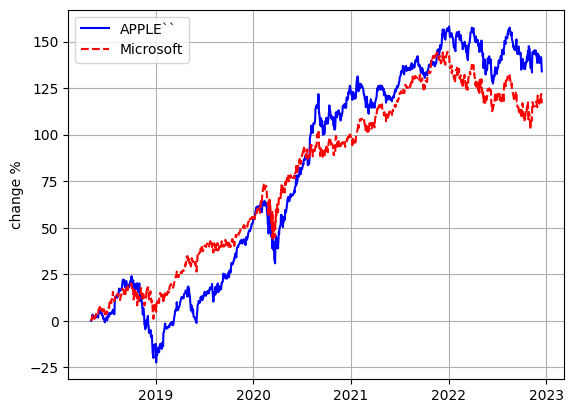

In [45]:
# APPL, MSFT 주식 수익률 비교
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
yf.pdr_override()

aapl = pdr.get_data_yahoo('aapl',start="2018-05-04", progress = False)
aapl_dpc = (aapl["Close"]-aapl['Close'].shift(1)) / aapl['Close'].shift(1) * 100
aapl_dpc.iloc[0] = 0 # 일간 변동률의 첫 번째 값인 NaN을 0으로 변경한다.
aapl_dpc_cs = aapl_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT',start="2018-05-04", progress = False)
msft_dpc = (msft["Close"]-msft['Close'].shift(1)) / msft['Close'].shift(1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

plt.plot(aapl.index, aapl_dpc_cs, 'b', label="APPLE``")
plt.plot(msft.index, msft_dpc_cs, 'r--', label="Microsoft")
plt.ylabel("change %")
plt.grid(True)
plt.legend(loc='best')
plt.show()

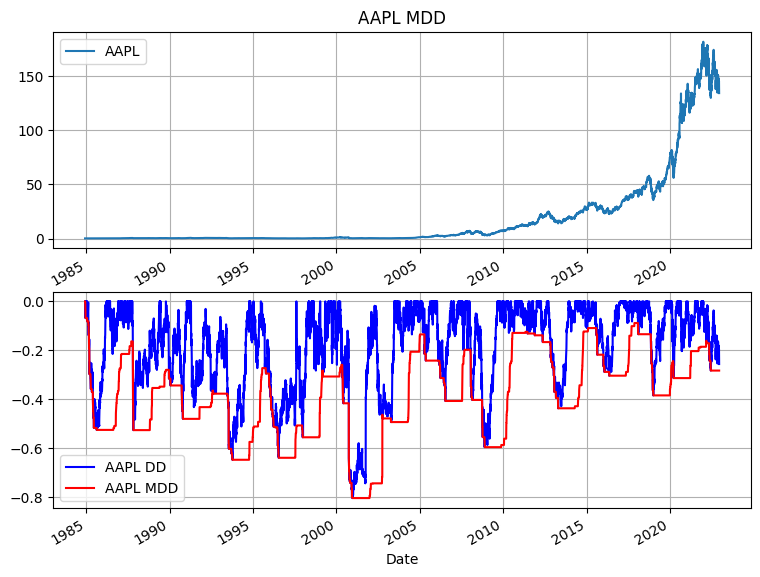

Date
2000-12-19   -0.805808
2000-12-20   -0.805808
2000-12-21   -0.805808
2000-12-22   -0.805808
2000-12-26   -0.805808
                ...   
2001-12-18   -0.805808
2001-12-19   -0.805808
2001-12-20   -0.805808
2001-12-21   -0.805808
2001-12-24   -0.805808
Name: Adj Close, Length: 252, dtype: float64

In [46]:
# Max Draw Down 최대 손실 낙폭
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()


# 1984년 12월 01일부터 AAPL데이터를 불러온다.
aapl = pdr.get_data_yahoo("aapl", "1984-12-01", progress = False)

window = 252 # 어림잡아 1년동안 개장일
peak = aapl['Adj Close'].rolling(window, min_periods=1).max()
drawdown = aapl['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9,7))
plt.subplot(211) # 2행 1열 중 1행에 그린다.
aapl["Close"].plot(label="AAPL",title="AAPL MDD", grid=True, legend=True)
plt.subplot(212) # 2행 1열중 2행에 그린다.
drawdown.plot(c='blue', label="AAPL DD", grid=True, legend=True)
max_dd.plot(c="red", label="AAPL MDD", grid=True, legend=True)
plt.show()

# 최대 낙폭은 약 80% 정도로 볼 수 있다.
max_dd[max_dd == max_dd.min()]

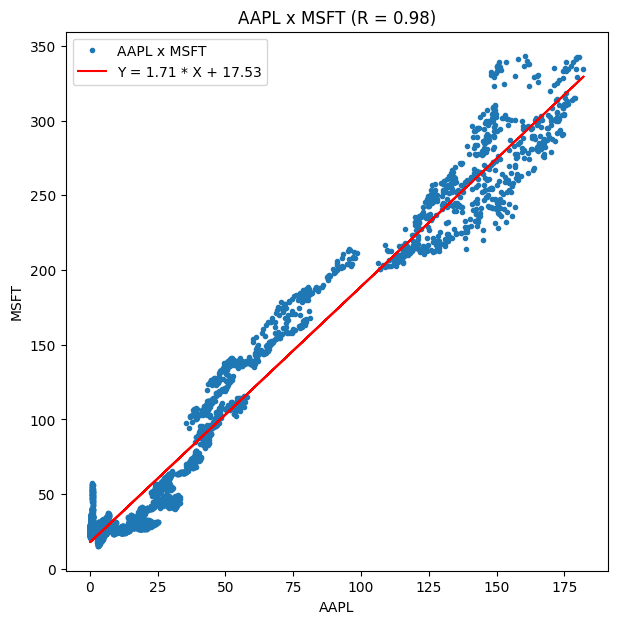

,X,Y
X,1.000000,0.980701
Y,0.980701,1.000000


In [47]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from scipy import stats
import matplotlib.pylab as plt
yf.pdr_override()

AAPL = pdr.get_data_yahoo("AAPL","2000-01-04", progress = False)
MSFT = pdr.get_data_yahoo("MSFT","2000-01-04", progress = False)

df = pd.DataFrame({"X": AAPL["Close"], "Y": MSFT["Close"]})
df = df.fillna(method="bfill")
df = df.fillna(method="ffill")

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, ".")
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(["AAPL x MSFT", regr_line])
plt.title(f"AAPL x MSFT (R = {regr.rvalue:.2f})")
plt.xlabel("AAPL")
plt.ylabel("MSFT")
plt.show()

# AAPL과 MSFT의 상관계수가 0.98로 매우 높은 것을 볼 수 있다.
df.corr()

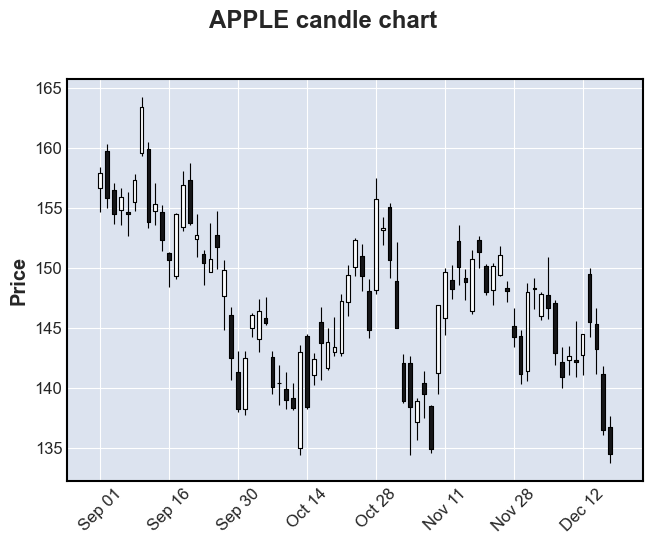

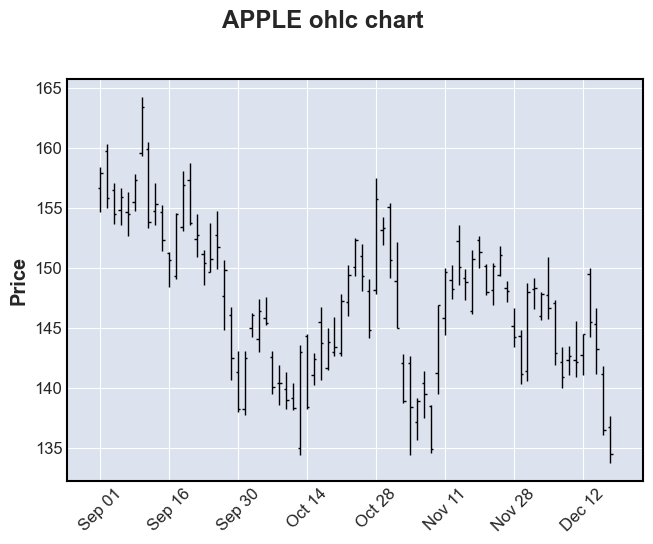

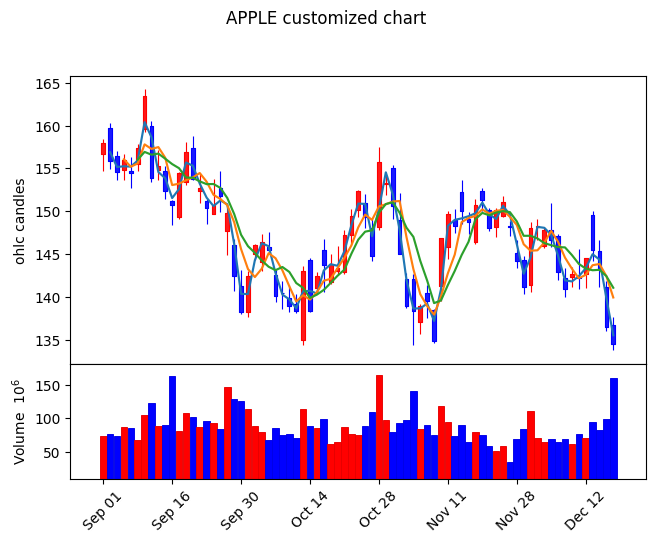

In [48]:
# AAPL 캔들차트 그리기
from pandas_datareader import data as pdr
import yfinance as yf
import mplfinance as mpf
yf.pdr_override()

aapl = pdr.get_data_yahoo('aapl',start="2022-09-01", progress = False)
mpf.plot(aapl, title='APPLE candle chart', type='candle')
mpf.plot(aapl, title='APPLE ohlc chart', type='ohlc')
kwargs = dict(title='APPLE customized chart', type='candle', mav=(2, 4, 6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(aapl, **kwargs, style=s)

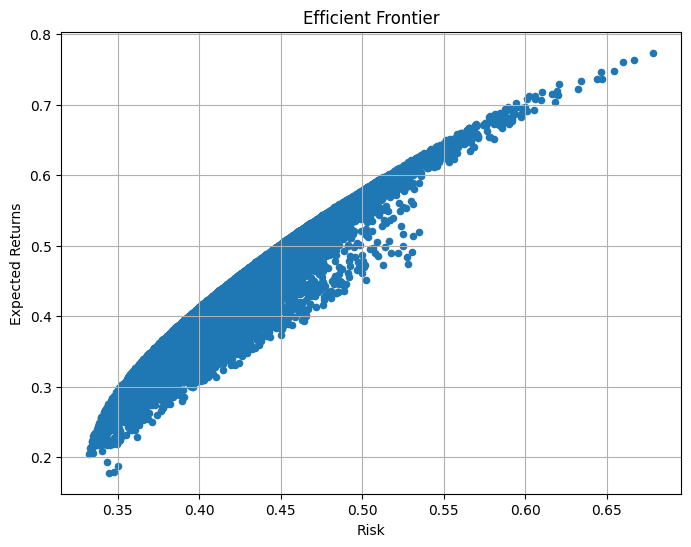

In [49]:
# Efficient Frontier 효율적 투자선
# 주어진 리스크에서 최대 수익을 낸다.
# 포트폴리오 리스크 = (종목별 비중)T((종목별 연간 공분산)(종목별 비중))^1/2
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame()
yf.pdr_override()
stocks = ["AAPL", "GOOGL", "TSLA", "NVDA"]
for i in stocks:
    df[i] = pdr.get_data_yahoo(i, start="2020-01-01", progress = False)['Close']

daily_ret = df.pct_change() # 일간 변동률
annual_ret = daily_ret.mean() * 252 # 연간 수익률
daily_cov = daily_ret.cov() # 일간 리스크
annual_cov = daily_cov * 252 # 연간 리스크

port_ret = []
port_risk = []
port_weights = []

for _ in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)

portfolio = {'Returns': port_ret, 'Risk': port_risk}
for i, s in enumerate(stocks):
    portfolio[s] = [weights[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk'] + [s for s in stocks]]

df.plot.scatter(x='Risk', y='Returns', figsize=(8,6), grid=True)
plt.title('Efficient Frontier')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

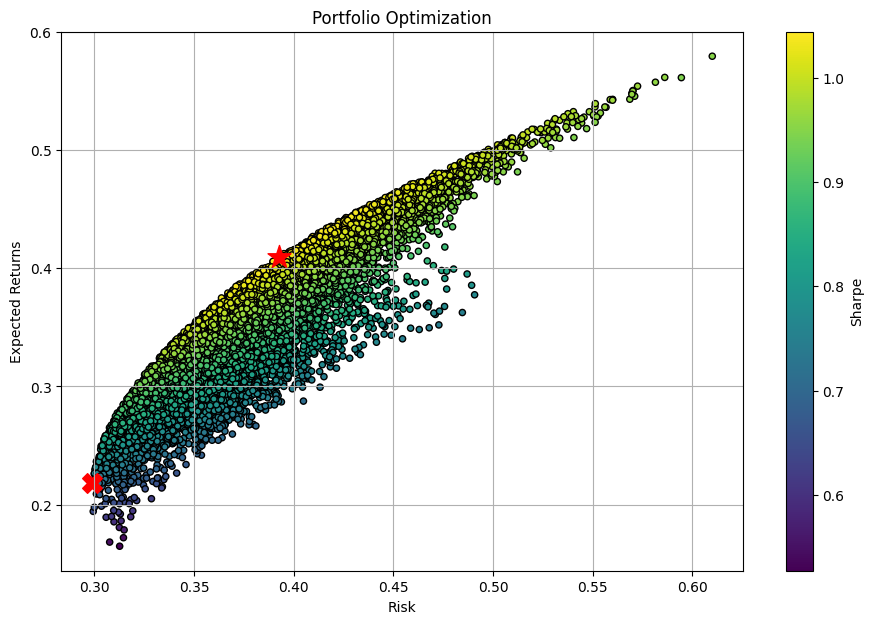

,Returns,Risk,Sharpe,AAPL,GOOGL,TSLA,NVDA
19725,0.409932,0.392545,1.044292,0.015959,0.350162,0.006536,0.627343


In [50]:
# Portfolio Optimization 포트폴리오 최적화
# 샤프지수 = (포트폴리오 예상 수익률 - 무위험률) / 수익률의 표준편차
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
# from tqdm import tqdm_notebook
df = pd.DataFrame()
yf.pdr_override()
stocks = ["AAPL", "GOOGL", "TSLA", "NVDA"]
for i in stocks:
    df[i] = pdr.get_data_yahoo(i, start="2018-01-01", progress = False)['Close']

daily_ret = df.pct_change() # 일간 변동률
annual_ret = daily_ret.mean() * 252 # 연간 수익률
daily_cov = daily_ret.cov() # 일간 리스크
annual_cov = daily_cov * 252 # 연간 리스크

port_ret = []
port_risk = []
port_weights = []
sharpe_ratio = []

for i in range(20000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)

    returns = np.dot(weights, annual_ret)
    risk = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    port_ret.append(returns)
    port_risk.append(risk)
    port_weights.append(weights)
    sharpe_ratio.append(returns/risk)

portfolio = {'Returns': port_ret, 'Risk': port_risk, 'Sharpe': sharpe_ratio}
for i, s in enumerate(stocks):
    portfolio[s] = [weights[i] for weight in port_weights]
df = pd.DataFrame(portfolio)
df = df[['Returns', 'Risk', 'Sharpe'] + [s for s in stocks]]

max_sharp = df.loc[df['Sharpe'] == df['Sharpe'].max()]
min_risk = df.loc[df['Risk'] == df['Risk'].min()]

df.plot.scatter(x='Risk', y='Returns', c="Sharpe", cmap='viridis', edgecolors='k', figsize=(11,7), grid=True)
plt.scatter(x=max_sharp['Risk'], y=max_sharp['Returns'], c='r', marker="*", s = 300)
plt.scatter(x=min_risk['Risk'], y=min_risk['Returns'], c='r', marker="X", s = 200)
plt.title('Portfolio Optimization')
plt.xlabel('Risk')
plt.ylabel('Expected Returns')
plt.show()

max_sharp

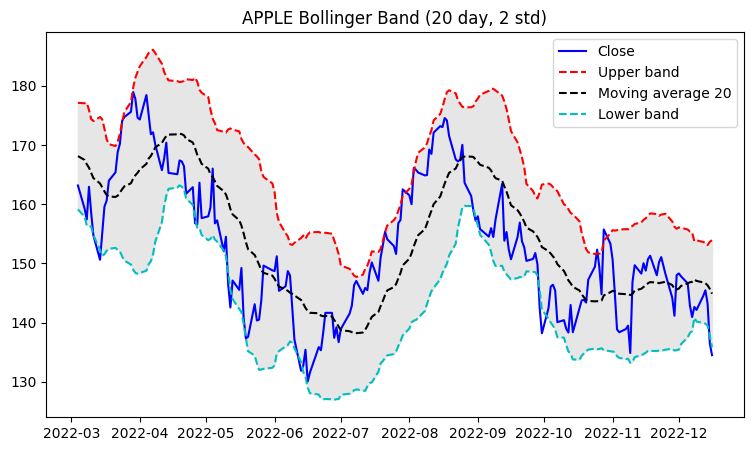

In [51]:
# Bollinger Bands
# 상단 볼린저 밴드 = 중간 볼린저 밴드 + (2 * 표준편차)
# 중간 볼린저 밴드 = 종가의 20일 이동평균
# 하단 볼린저 밴드 = 중간 볼린저 밴드 - (2 * 표준편차)
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL","2022-02-04", progress = False)
df['MA20'] = df["Close"].rolling(window=20).mean() # 20개 종가를 이용해서 평균을 구한다
df["stddev"] = df["Close"].rolling(window=20).std() # 20개의 종가로 표준편차를 구한다
df["upper"] = df["MA20"] + (df["stddev"] * 2) # 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df["stddev"] * 2) # 하단 볼린저 밴드
df = df[19:] # 19행까지 NaN이기 때문에 20행부터 사용한다

plt.figure(figsize=(9,5))
plt.plot(df.index, df['Close'], color="#0000ff", label="Close")
plt.plot(df.index, df['upper'], "r--", label="Upper band")
plt.plot(df.index, df['MA20'], "k--", label="Moving average 20")
plt.plot(df.index, df['lower'], "c--", label="Lower band")
plt.fill_between(df.index, df["upper"], df["lower"], color="0.9")
plt.legend(loc="best")
plt.title("APPLE Bollinger Band (20 day, 2 std)")
plt.show()

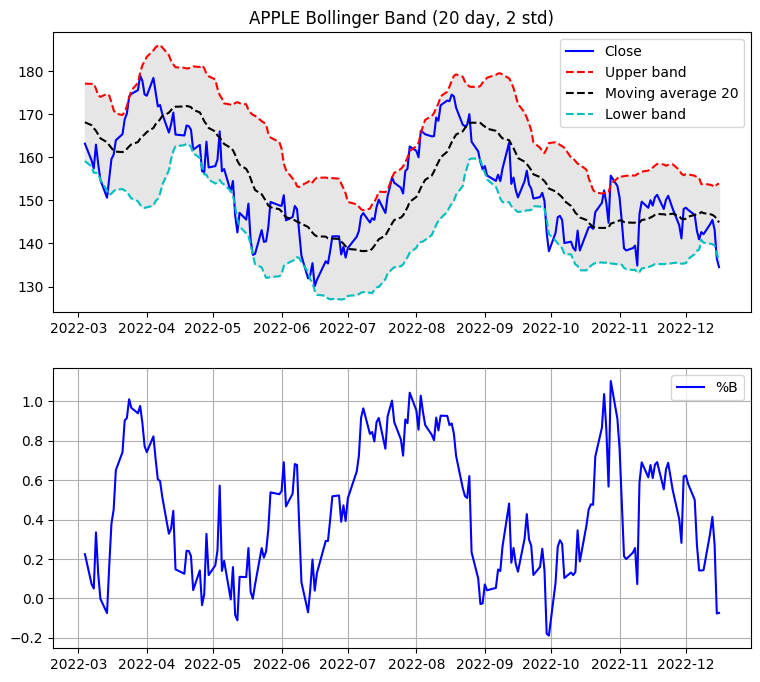

In [52]:
# Bollinger Bands %b
# %b = (종가 - 하단 볼린저 밴드) / (상단 볼린저 밴드 - 하단 볼린저 밴드), 주가가 볼린저 밴드 어디에 위치하는지를 나타내는 지표
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL","2022-02-04", progress = False)
df['MA20'] = df["Close"].rolling(window=20).mean() # 20개 종가를 이용해서 평균을 구한다
df["stddev"] = df["Close"].rolling(window=20).std() # 20개의 종가로 표준편차를 구한다
df["upper"] = df["MA20"] + (df["stddev"] * 2) # 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df["stddev"] * 2) # 하단 볼린저 밴드
df["PB"] = (df['Close'] - df["lower"]) / (df["upper"] - df["lower"]) # %b 칼럼을 생성한다
df = df[19:] # 19행까지 NaN이기 때문에 20행부터 사용한다

plt.figure(figsize=(9,8))
plt.subplot(2,1,1) # 기존 볼린저 밴드 차트를 2행 1열의 그리드에서 1열에 배치한다
plt.plot(df.index, df['Close'], color="#0000ff", label="Close")
plt.plot(df.index, df['upper'], "r--", label="Upper band")
plt.plot(df.index, df['MA20'], "k--", label="Moving average 20")
plt.plot(df.index, df['lower'], "c--", label="Lower band")
plt.fill_between(df.index, df["upper"], df["lower"], color="0.9")
plt.legend(loc="best")
plt.title("APPLE Bollinger Band (20 day, 2 std)")

plt.subplot(2,1,2) # %b 차트를 2행 1열의 그리드에서 1열에 배치한다
plt.plot(df.index, df["PB"], color="b", label="%B")
plt.grid(True)
plt.legend(loc="best")
plt.show()

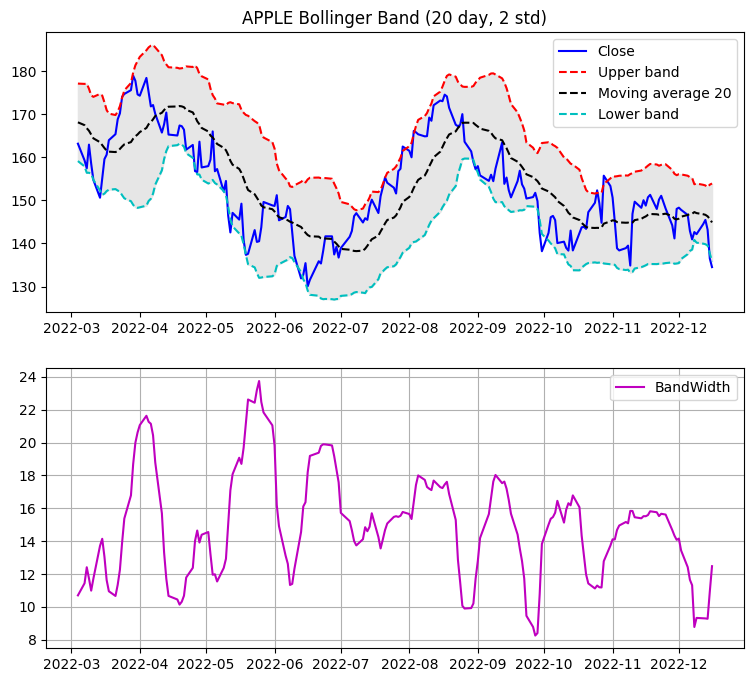

In [53]:
# Bollinger Bands BandWidth
# 상단 볼린저 밴드와 하단 볼린저 밴드 사이의 폭을 의미한다.
# 밴드폭이 6개월 저점을 기록하는 것을 보고 스퀴즈를 파악할 수 있다고 한다. 앞으로 변동성이 심해질 예정
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL","2022-02-04", progress = False)
df['MA20'] = df["Close"].rolling(window=20).mean() # 20개 종가를 이용해서 평균을 구한다
df["stddev"] = df["Close"].rolling(window=20).std() # 20개의 종가로 표준편차를 구한다
df["upper"] = df["MA20"] + (df["stddev"] * 2) # 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df["stddev"] * 2) # 하단 볼린저 밴드
df["bandwidth"] = (df["upper"] - df["lower"]) / df["MA20"] * 100
df = df[19:] # 19행까지 NaN이기 때문에 20행부터 사용한다

plt.figure(figsize=(9,8))
plt.subplot(2,1,1) # 기존 볼린저 밴드 차트를 2행 1열의 그리드에서 1열에 배치한다
plt.plot(df.index, df['Close'], color="#0000ff", label="Close")
plt.plot(df.index, df['upper'], "r--", label="Upper band")
plt.plot(df.index, df['MA20'], "k--", label="Moving average 20")
plt.plot(df.index, df['lower'], "c--", label="Lower band")
plt.fill_between(df.index, df["upper"], df["lower"], color="0.9")
plt.legend(loc="best")
plt.title("APPLE Bollinger Band (20 day, 2 std)")

plt.subplot(2,1,2) # %b 차트를 2행 1열의 그리드에서 1열에 배치한다
plt.plot(df.index, df["bandwidth"], color="m", label="BandWidth")
plt.grid(True)
plt.legend(loc="best")
plt.show()

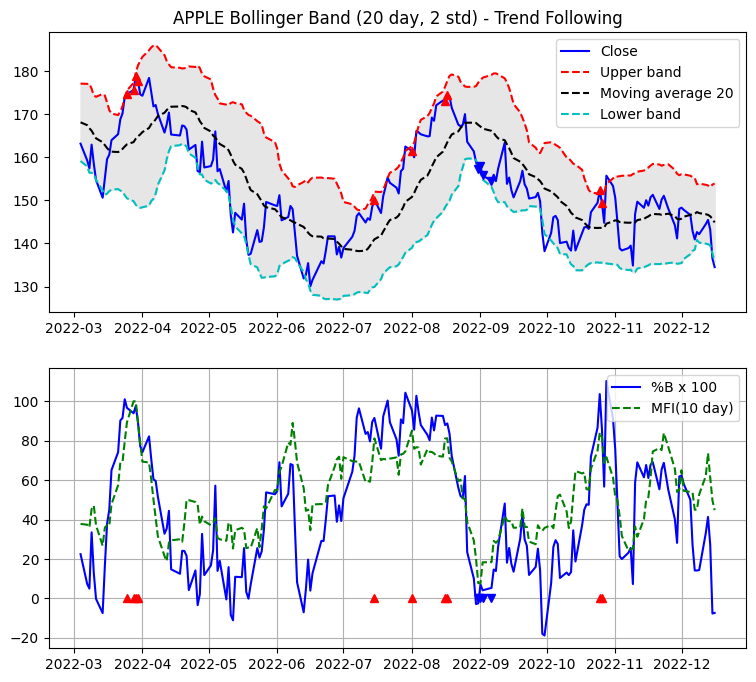

In [54]:
# MFI(현금흐름지표, Money Flow Index)
# Typical Price(중심 가격) = 일정 기간의 고가, 저가, 종가를 합한 뒤에 3으로 나눈 값
# 일반적으로 주가에 선행함, 거래량 데이터에 RSI개념을 도입한 지표로 생각할 수 있다.
# MFI = 100 - (100/(1+PMF/NMF))
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL","2022-02-04", progress = False)
df['MA20'] = df["Close"].rolling(window=20).mean() # 20개 종가를 이용해서 평균을 구한다
df["stddev"] = df["Close"].rolling(window=20).std() # 20개의 종가로 표준편차를 구한다
df["upper"] = df["MA20"] + (df["stddev"] * 2) # 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df["stddev"] * 2) # 하단 볼린저 밴드
df["PB"] = (df['Close'] - df["lower"]) / (df["upper"] - df["lower"]) # %b 칼럼을 생성한다
df["TP"] = (df["High"] + df["Low"] + df["Close"]) / 3 # Typical price를 구한다
df["PMF"] = 0
df["NMF"] = 0
for i in range(len(df.Close) - 1):
    if df.TP.values[i] < df.TP.values[i+1]:
        # i번째 중심 가격보다 i+1번째 중심가격이 높면 i+1번째 중심가격과 i+1번째 거래량의 곱을 pmf(positive money flow)에 저장한다
        df.PMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        df.NMF.values[i+1] = 0
    else:
        df.NMF.values[i+1] = df.TP.values[i+1] * df.Volume.values[i+1]
        df.PMF.values[i+1] = 0
df["MFR"] = df.PMF.rolling(window=10).sum() / df.NMF.rolling(window=10).sum()
df["MFI10"] = 100 - 100/ (1+df["MFR"])
df = df[19:] # 19행까지 NaN이기 때문에 20행부터 사용한다

plt.figure(figsize=(9,8))
plt.subplot(2,1,1) # 기존 볼린저 밴드 차트를 2행 1열의 그리드에서 1열에 배치한다
plt.plot(df.index, df['Close'], color="#0000ff", label="Close")
plt.plot(df.index, df['upper'], "r--", label="Upper band")
plt.plot(df.index, df['MA20'], "k--", label="Moving average 20")
plt.plot(df.index, df['lower'], "c--", label="Lower band")
plt.fill_between(df.index, df["upper"], df["lower"], color="0.9")
plt.title("APPLE Bollinger Band (20 day, 2 std) - Trend Following")
for i in range(len(df.Close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        # %b가 0.8보다 크고 10일 기준 MFI가 80보다 매수시점을 나타내기 위해 그래프의 종가 위치에 빨간색 삼각형을 그린다.
        plt.plot(df.index.values[i], df.Close.values[i], "r^")
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], df.Close.values[i], "bv")
plt.legend(loc="best")

plt.subplot(2,1,2) # %b 차트를 2행 1열의 그리드에서 1열에 배치한다
plt.plot(df.index, df["PB"] * 100, "b", label="%B x 100")
plt.plot(df.index, df["MFI10"], "g--", label="MFI(10 day)")
plt.yticks([-20, 0, 20, 40, 60, 80, 100, 120])
for i in range(len(df.Close)):
    if df.PB.values[i] > 0.8 and df.MFI10.values[i] > 80:
        plt.plot(df.index.values[i], 0, "r^")
    elif df.PB.values[i] < 0.2 and df.MFI10.values[i] < 20:
        plt.plot(df.index.values[i], 0, "bv")
plt.grid(True)
plt.legend(loc="best")
plt.show()

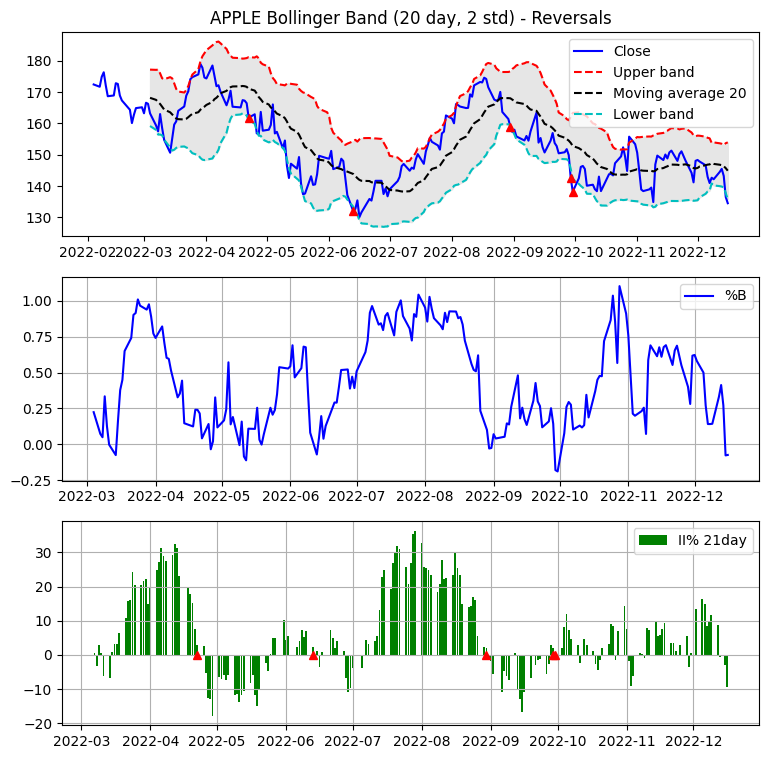

In [55]:
# Intraday intensity(II) 일중 강도
# II = (2 * 종가 - 고가 - 저가) / (고가 - 저가) * 거래량 -> 종가 고가와 저가에 비해 상대적으로 어느정도에 위치하는지를 나타냄
# II% = II(21일 합)/거래량(21일 합) * 100
# 존 볼린저는 일중 강도율을 볼린저 밴드를 확증하는 도구로 사용함, 하단 볼린저, 일중 강도율 + -> 매수
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL","2022-02-04", progress = False)
df['MA20'] = df["Close"].rolling(window=20).mean() # 20개 종가를 이용해서 평균을 구한다
df["stddev"] = df["Close"].rolling(window=20).std() # 20개의 종가로 표준편차를 구한다
df["upper"] = df["MA20"] + (df["stddev"] * 2) # 상단 볼린저 밴드
df["lower"] = df["MA20"] - (df["stddev"] * 2) # 하단 볼린저 밴드
df["PB"] = (df['Close'] - df["lower"]) / (df["upper"] - df["lower"]) # %b 칼럼을 생성한다

# Intraday intensity
df["II"] = (2*df["Close"] - df["High"] - df["Low"]) / (df["High"] - df["Low"]) * df["Volume"]
# II%
df["IIP21"] = df["II"].rolling(window=21).sum() / df["Volume"].rolling(window=21).sum() * 100
df.dropna() # NaN value 제거하기

plt.figure(figsize=(9,9))
plt.subplot(3,1,1) # 기존 볼린저 밴드 차트를 3행 1열 그리드에서 1열에 배치한다
plt.title("APPLE Bollinger Band (20 day, 2 std) - Reversals")
plt.plot(df.index, df['Close'], color="#0000ff", label="Close")
plt.plot(df.index, df['upper'], "r--", label="Upper band")
plt.plot(df.index, df['MA20'], "k--", label="Moving average 20")
plt.plot(df.index, df['lower'], "c--", label="Lower band")
plt.fill_between(df.index, df["upper"], df["lower"], color="0.9")
for i in range(0, len(df.Close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], df.Close.values[i], "r^")
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], df.Close.values[i], "bv")
plt.legend(loc="best")

plt.subplot(3,1,2) # %b 차트를 3행 1열의 2그리드 열에 배치한다
plt.plot(df.index, df["PB"], "b", label="%B")
plt.grid(True)
plt.legend(loc="best")

plt.subplot(3,1,3) # IIP21% 차트를 3행 1열의 3그리드 열에 배치한다.
plt.bar(df.index, df["IIP21"], color="g", label="II% 21day")
for i in range(0, len(df.Close)):
    if df.PB.values[i] < 0.05 and df.IIP21.values[i] > 0:
        plt.plot(df.index.values[i], 0, "r^")
    elif df.PB.values[i] > 0.95 and df.IIP21.values[i] < 0:
        plt.plot(df.index.values[i], 0, "bv")
plt.grid(True)
plt.legend(loc="best")
plt.show()

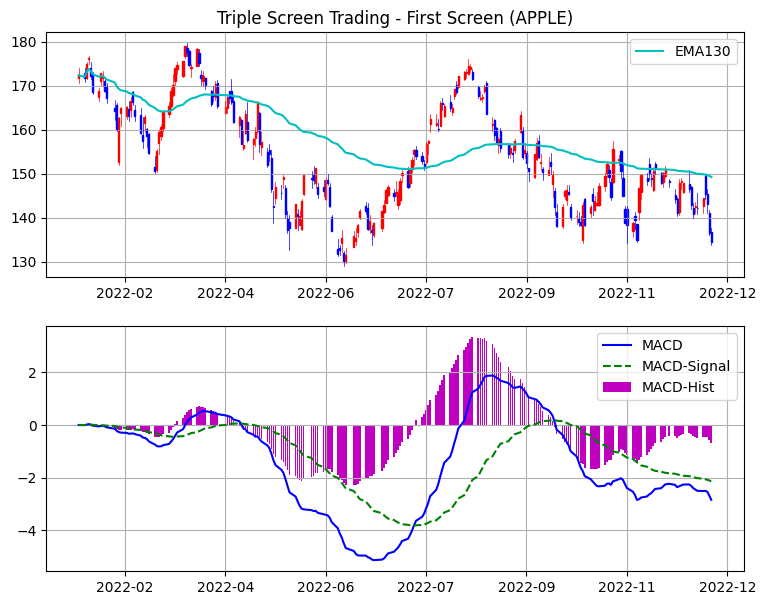

In [56]:
# 삼중창 매매 시스탬 - 첫 번째 창(추세 확인)
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL","2022-02-04", progress = False)
ema60 = df.Close.ewm(span=60).mean() # 종가의 12주 지수 이동평균
ema130 = df.Close.ewm(span=130).mean() # 종가의 26주 지수 이동평균
macd = ema60 - ema130 # macd선
signal = macd.ewm(span=45).mean() # 신호선(macd의 9주 지수 이동평균선)
macdhist = macd - signal # macd 히스토그램

df = df.assign(ema60=ema60, ema130=ema130, macd=macd, signal=signal, macdhist=macdhist).dropna()
df["Number"] = df.index.map(mdates.date2num)
ohlc = df[["Number", "Open", "High", "Low", "Close"]]

plt.figure(figsize=(9,7))
p1 = plt.subplot(2, 1, 1)
plt.title("Triple Screen Trading - First Screen (APPLE)")
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup="red", colordown="blue") # 차트 생성
p1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.plot(df.Number, df["ema130"], color="c", label="EMA130")
plt.legend(loc="best")

p2 = plt.subplot(2, 1, 2)
p2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True)
plt.bar(df.Number, df["macdhist"], color="m", label="MACD-Hist")
plt.plot(df.Number, df["macd"], color="b", label="MACD")
plt.plot(df.Number, df["signal"], "g--", label="MACD-Signal")
plt.legend(loc="best")
plt.show()

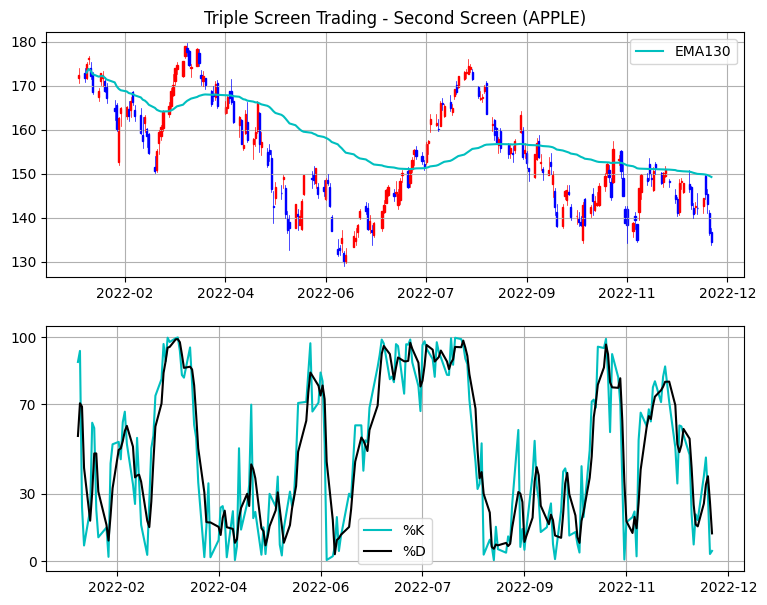

In [57]:
# 삼중창 매매 시스탬 - 두 번째 창(시장 파동)
# 오실레이터 -> 시장이 하락할 때 매수 기회, 시장이 상승할 때 매도 기회
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL","2022-02-04", progress = False)
ema60 = df.Close.ewm(span=60).mean() # 종가의 12주 지수 이동평균
ema130 = df.Close.ewm(span=130).mean() # 종가의 26주 지수 이동평균
macd = ema60 - ema130 # macd선
signal = macd.ewm(span=45).mean() # 신호선(macd의 9주 지수 이동평균선)
macdhist = macd - signal # macd 히스토그램

df = df.assign(ema60=ema60, ema130=ema130, macd=macd, signal=signal, macdhist=macdhist).dropna()
df["Number"] = df.index.map(mdates.date2num)
ohlc = df[["Number", "Open", "High", "Low", "Close"]]

ndays_high = df.High.rolling(window=14, min_periods=1).max() # 14일 동안의 최댓값을 구한다
ndays_low = df.Low.rolling(window=14, min_periods=1).min() # 14일 동안의 최솟값을 구한다.
fast_k = (df.Close - ndays_low) / (ndays_high - ndays_low) * 100 # %k를 구한다.
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()

plt.figure(figsize=(9,7))
p1 = plt.subplot(2, 1, 1)
plt.title("Triple Screen Trading - Second Screen (APPLE)")
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup="red", colordown="blue") # 차트 생성
p1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.plot(df.Number, df["ema130"], color="c", label="EMA130")
plt.legend(loc="best")

p2 = plt.subplot(2, 1, 2)
p2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True)
plt.plot(df.Number, df["fast_k"], color="c", label="%K")
plt.plot(df.Number, df["slow_d"], color="k", label="%D")
plt.yticks([0,30,70,100])
plt.legend(loc="best")
plt.show()
# ex) 130일 지수 이동 평균이 상승하고 있을 때 스토캐스틱이 30 아래로 내려가면 매수 기회, 하락하고 있을 때 70위로 올라가면 매도 기회

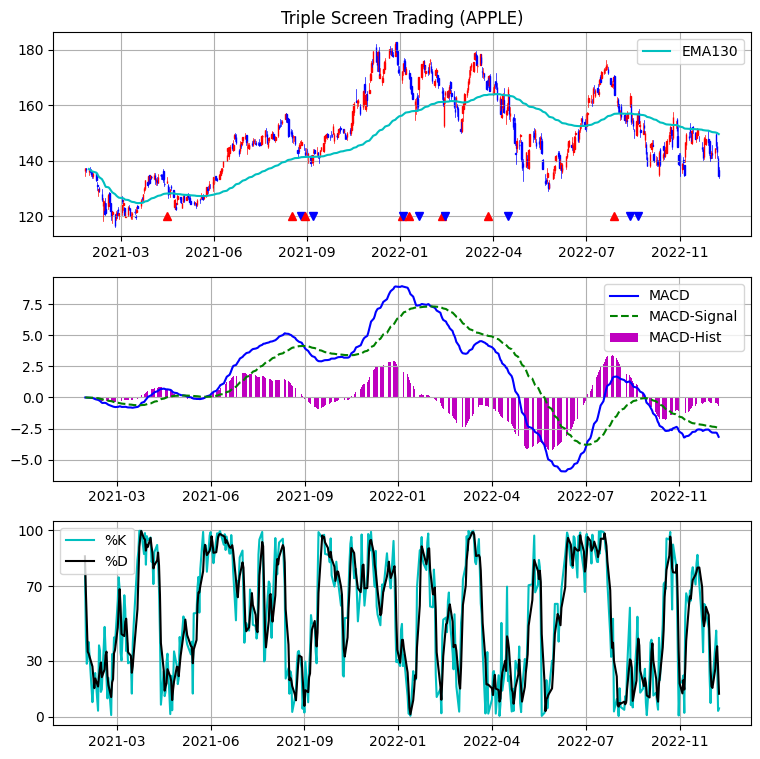

In [58]:
# 삼중창 매매 시스탬 - 세 번째 창(진입 기술)
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
yf.pdr_override()

df = pdr.get_data_yahoo("AAPL","2021-02-04", progress = False)
ema60 = df.Close.ewm(span=60).mean() # 종가의 12주 지수 이동평균
ema130 = df.Close.ewm(span=130).mean() # 종가의 26주 지수 이동평균
macd = ema60 - ema130 # macd선
signal = macd.ewm(span=45).mean() # 신호선(macd의 9주 지수 이동평균선)
macdhist = macd - signal # macd 히스토그램

df = df.assign(ema60=ema60, ema130=ema130, macd=macd, signal=signal, macdhist=macdhist).dropna()
df["Number"] = df.index.map(mdates.date2num)
ohlc = df[["Number", "Open", "High", "Low", "Close"]]

ndays_high = df.High.rolling(window=14, min_periods=1).max() # 14일 동안의 최댓값을 구한다
ndays_low = df.Low.rolling(window=14, min_periods=1).min() # 14일 동안의 최솟값을 구한다.
fast_k = (df.Close - ndays_low) / (ndays_high - ndays_low) * 100 # %k를 구한다.
slow_d = fast_k.rolling(window=3).mean()
df = df.assign(fast_k=fast_k, slow_d=slow_d).dropna()

plt.figure(figsize=(9,9))
p1 = plt.subplot(3, 1, 1)
plt.title("Triple Screen Trading (APPLE)")
plt.grid(True)
candlestick_ohlc(p1, ohlc.values, width=.6, colorup="red", colordown="blue") # 차트 생성
p1.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.plot(df.Number, df["ema130"], color="c", label="EMA130")
for i in range(1,len(df.Close)):
    if df.ema130.values[i-1] < df.ema130.values[i] and \
            df.slow_d.values[i-1] >= 30 and df.slow_d.values[i] < 30:
        plt.plot(df.Number.values[i], 120, "r^")
    elif df.ema130.values[i-1] < df.ema130.values[i] and \
            df.slow_d.values[i-1] <= 30 and df.slow_d.values[i] > 30:
        plt.plot(df.Number.values[i], 120, "bv")
plt.legend(loc="best")

p2 = plt.subplot(3, 1, 2)
p2.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True)
plt.bar(df.Number, df["macdhist"], color="m", label="MACD-Hist")
plt.plot(df.Number, df["macd"], color="b", label="MACD")
plt.plot(df.Number, df["signal"], "g--", label="MACD-Signal")
plt.legend(loc="best")


p3 = plt.subplot(3, 1, 3)
p3.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.grid(True)
plt.plot(df.Number, df["fast_k"], color="c", label="%K")
plt.plot(df.Number, df["slow_d"], color="k", label="%D")
plt.yticks([0,30,70,100])
plt.legend(loc="best")
plt.show()

Initial Portfolio Value : 100,000 USD
Final Portfolio Value   : 101,380 USD


<IPython.core.display.Javascript object>

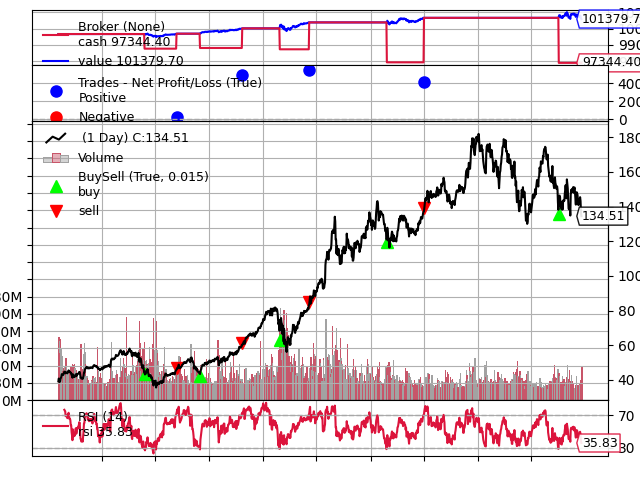

In [59]:
# Backtrader - RSI
# RS = N일간의 상승폭의 평균 / N일간의 하락폭의 평균
# RSI = 100 - 100 / (1 + RS), 가격의 움직임의 강도를 백분율로 나타내며 추세가 언제 전환될지 예측하는데 유용함
import backtrader as bt
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import Image
# %matplotlib inline

class MyStrategy(bt.Strategy):
    def __init__(self):
        self.rsi = bt.indicators.RSI(self.data.close)
    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.order = self.buy()
        else:
            if self.rsi > 70:
                self.order = self.sell()

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)
data = bt.feeds.PandasData(dataname = yf.download('AAPL', '2018-02-04', "2022-12-18", progress = False))
cerebro.adddata(data)
cerebro.broker.setcash(100000)
cerebro.addsizer(bt.sizers.SizerFix, stake=30)

print(f"Initial Portfolio Value : {cerebro.broker.get_value():,.0f} USD")
cerebro.run()
print(f"Final Portfolio Value   : {cerebro.broker.get_value():,.0f} USD")
# cerebro.plot() -> 이미지 안보임

figure = cerebro.plot()[0][0]
figure.savefig('./IMG/RSI.png')
Image("IMG/RSI.png")

Initial Portfolio Value : 100,000 USD
[2018-11-21] BUY  : price 44.93, size 2,034, commission 127.96, total 98,371.87
[2019-02-05] SELL : price 43.22, size -2,034, commission 123.07, total 96,255.36
[2019-06-03] BUY  : price 43.90, size 1,979, commission 121.65, total 94,995.60
[2019-06-25] SELL : price 49.61, size -1,979, commission 137.46, total 107,293.20
[2020-03-02] BUY  : price 70.57, size 1,413, commission 139.60, total 112,992.79
[2020-05-06] SELL : price 75.11, size -1,413, commission 148.59, total 113,427.06
[2021-02-25] BUY  : price 124.68, size 814, commission 142.15, total 110,279.79
[2021-04-20] SELL : price 135.02, size -814, commission 153.94, total 121,551.80
[2021-10-05] BUY  : price 139.49, size 786, commission 153.54, total 122,671.96
[2021-11-03] SELL : price 150.39, size -786, commission 165.54, total 129,802.67
[2022-01-27] BUY  : price 162.45, size 732, commission 166.38, total 127,273.37
[2022-07-20] SELL : price 151.12, size -732, commission 154.77, total 121,

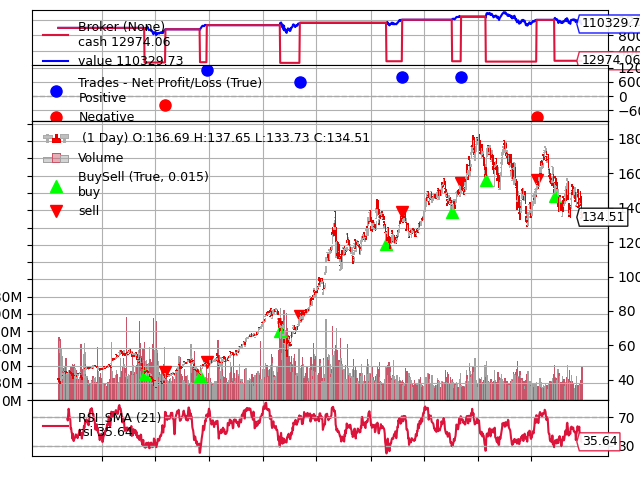

In [60]:
# Backtrader - RSI_SMA
# RSI_SMA : RSA의 21일 단순 이동 평균
import backtrader as bt
import yfinance as yf
from IPython.display import Image
# %matplotlib inline

class MyStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            return
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(f'BUY  : price {order.executed.price:,.2f}, '
                    f'size {order.executed.size:,.0f}, '
                    f'commission {order.executed.comm:,.2f}, '
                    f'total {cerebro.broker.getvalue():,.2f}')
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:
                self.log(f'SELL : price {order.executed.price:,.2f}, '
                    f'size {order.executed.size:,.0f}, '
                    f'commission {order.executed.comm:,.2f}, '
                    f'total {cerebro.broker.getvalue():,.2f}')
            self.bar_executed = len(self)
        elif order.status in [order.Canceled]:
            self.log('ORDER CANCELD')
        elif order.status in [order.Margin]:
            self.log('ORDER MARGIN')
        elif order.status in [order.Rejected]:
            self.log('ORDER REJECTED')
        self.order = None

    def next(self):
        if not self.position:
            if self.rsi < 30:
                self.order = self.buy()
        else:
            if self.rsi > 70:
                self.order = self.sell()

    def log(self, txt, dt=None):
        dt = self.datas[0].datetime.date(0)
        print(f'[{dt.isoformat()}] {txt}')

cerebro = bt.Cerebro()
cerebro.addstrategy(MyStrategy)

data = bt.feeds.PandasData(dataname = yf.download('AAPL', '2018-02-04', "2022-12-18", progress = False))

cerebro.adddata(data)
cerebro.broker.setcash(100000)
cerebro.broker.setcommission(commission=0.0014)
cerebro.addsizer(bt.sizers.PercentSizer, percents=90)

print(f'Initial Portfolio Value : {cerebro.broker.getvalue():,.0f} USD')
cerebro.run()
print(f'Final Portfolio Value   : {cerebro.broker.getvalue():,.0f} USD')
# cerebro.plot(style='candlestick') -> 이미지 안보임

figure = cerebro.plot(style ='candlestick')[0][0]
figure.savefig('./IMG/RSI_CMA.png')
Image("IMG/RSI_CMA.png")

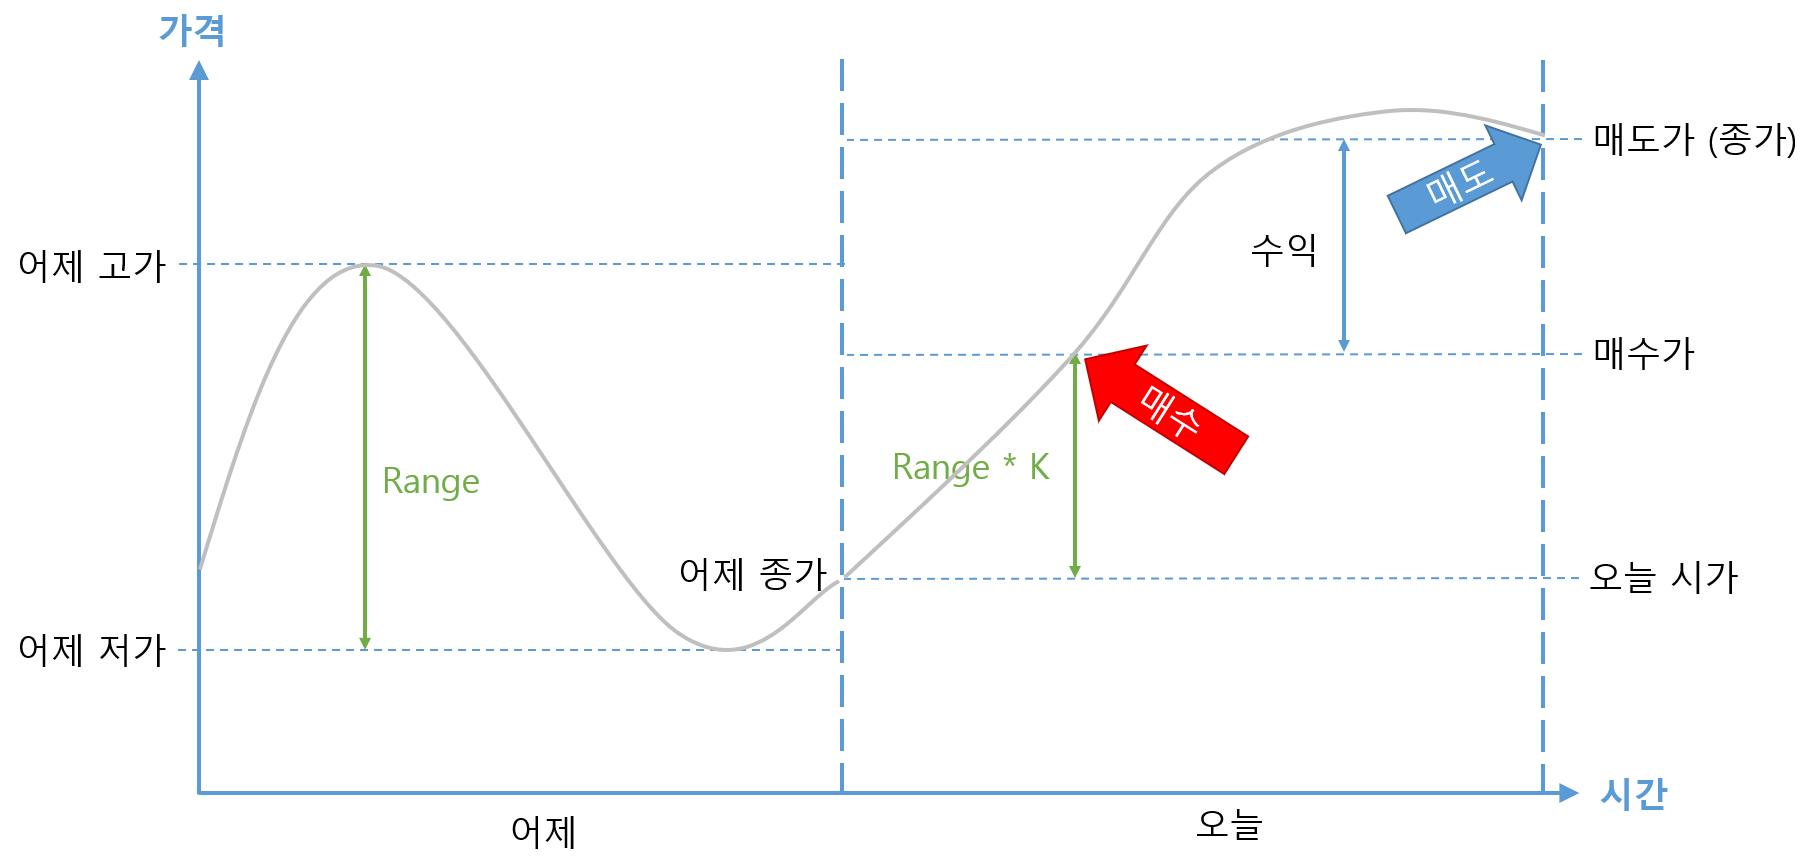

In [61]:
# 변동성 돌파 전략
# 1. 전날의 고가에서 저가를 빼서 가격 변동폭을 계산한다.
# 2. 장중 가격이 오늘의 시가 + 전일 변동폭 * k 를 돌파할 때 매수한다(일반적으로 k의 값은 0.5를 사용하지만, 수익률의 따라 조정한다)
# 3. 장 마감시 무조건 매도한다.
Image("IMG/VolatilityBreakout.png")

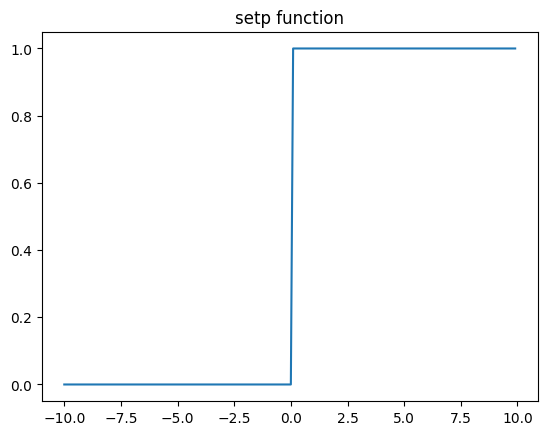

In [62]:
# 머신러닝 기초
# activation function(활성화 함수): 입력신호의 총합이 임계값을 넘어 설 때 특정값을 출력하는 함수를 확성화 함수라고 한다.

# Setp Function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def setpfunc(x):
    return np.where(x <= 0, 0, 1) # x값이 (x<=0)을 만족하면 0을 반환하고 그렇지 못하면 1을 반환한다

x = np.arange(-10, 10, 0.1) # x값은 -10 <= x < 10 의 수를 0.1간격으로 이루어진 소수의 배열
y = setpfunc(x)

plt.plot(x, y)
plt.title("setp function")
plt.show()

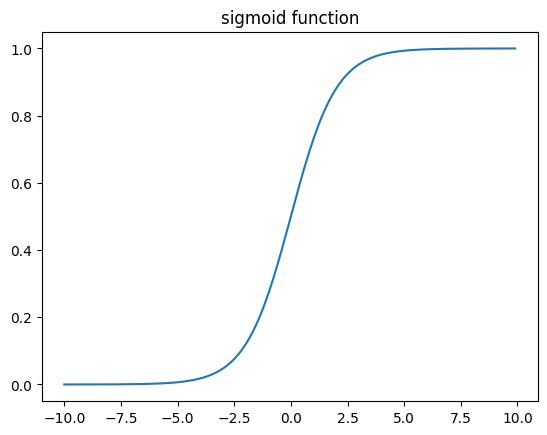

In [63]:
# Sigmoid Function: 0~1까지의 연속적인 실수를 표시하는 함수
# sigmoid function의 등장으로 더 복잡한 신경망에 대한 계산도 가능해졌다.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1/(1 + np.exp(-x)) # exp(x)는 e^x

x = np.arange(-10, 10, 0.1) # x값은 -10 <= x < 10 의 수를 0.1간격으로 이루어진 소수의 배열
y = sigmoid(x)

plt.plot(x, y)
plt.title("sigmoid function")
plt.show()

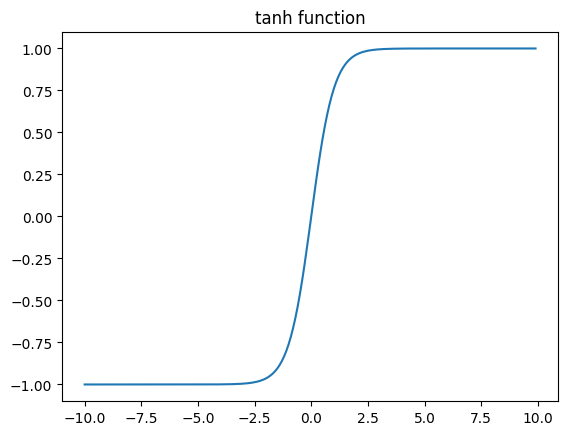

In [64]:
# Tanh Function : -1 ~ 1까지의 연속적인 실수를 표시하는 함수
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

x = np.arange(-10, 10, 0.1) # x값은 -10 <= x < 10 의 수를 0.1간격으로 이루어진 소수의 배열
y = tanh(x)

plt.plot(x, y)
plt.title("tanh function")
plt.show()

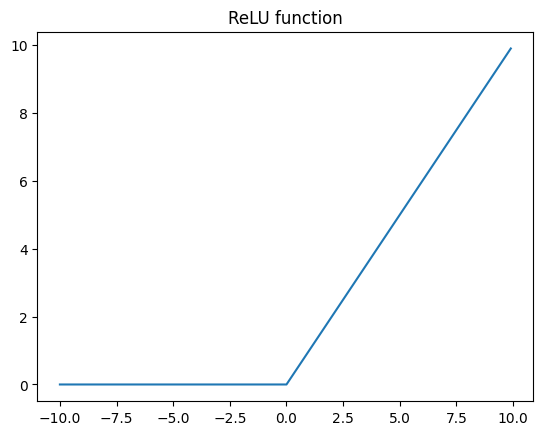

In [65]:
# ReLU Function : rectified linear unit, 정류된 직선(?), 음수를 0으로 만들고 0이상이면 받은 값 그대로 출력
# 신경망 분야에서 최근에 많이 사용됨
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def relu(x):
    return np.maximum(0, x) # maximum() 인수로 주어진 수 중 가장 큰 수를 반환한다

x = np.arange(-10, 10, 0.1) # x값은 -10 <= x < 10 의 수를 0.1간격으로 이루어진 소수의 배열
y = relu(x)

plt.plot(x, y)
plt.title("ReLU function")
plt.show()


In [66]:
# softmax function : 입력받은 값들을 0~1 사이 값으로 정규화 한다, 입력 받은 값들의 총합 = 1
import numpy as np
import matplotlib as plt
%matplotlib inline

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

softmax([1, 1, 2])

array([0.21194156, 0.21194156, 0.57611688])

step|    w|    b| cost
----|-----|-----|-----
   1| 0.78| 0.72| 1.62


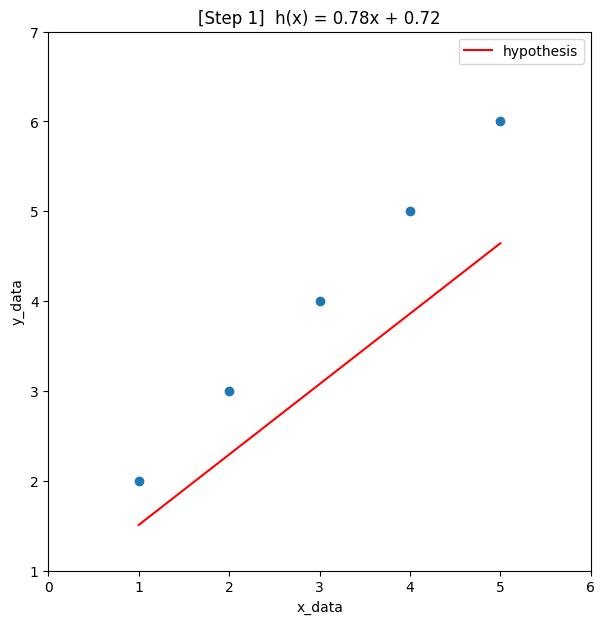

   3| 0.90| 0.76| 0.55


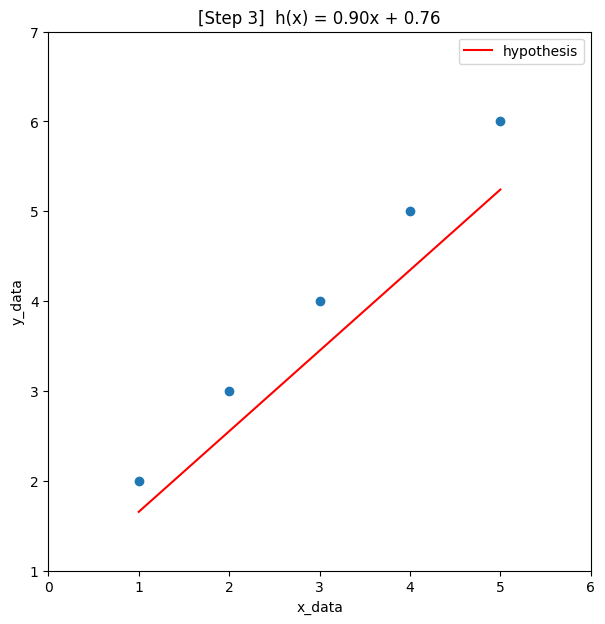

   5| 0.96| 0.78| 0.19


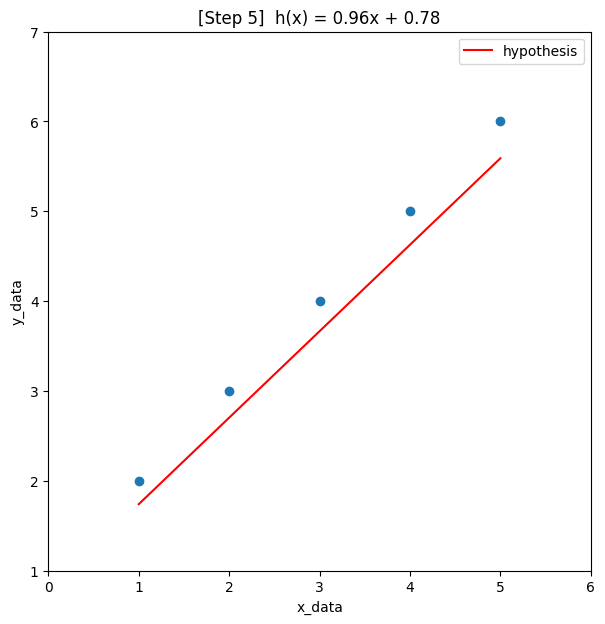

  10| 1.03| 0.80| 0.02


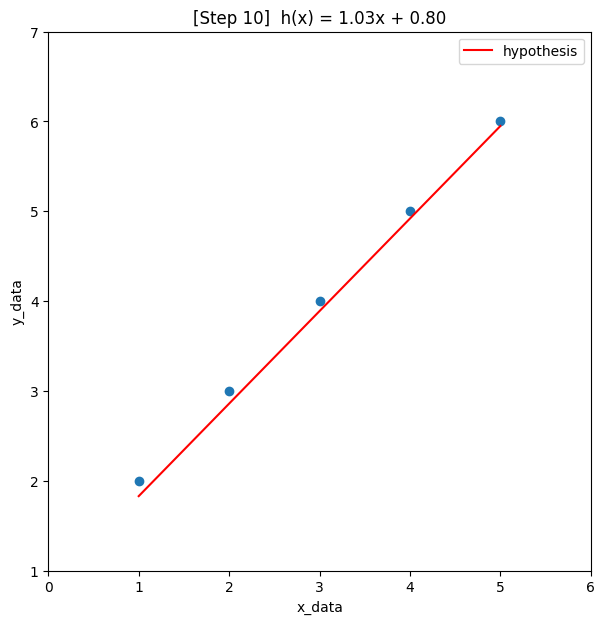

1000| 1.00| 0.99| 0.00


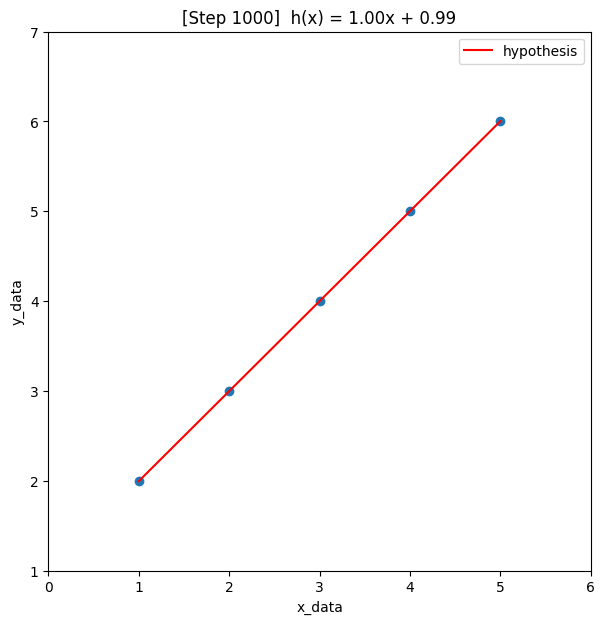

1100| 1.00| 1.00| 0.00


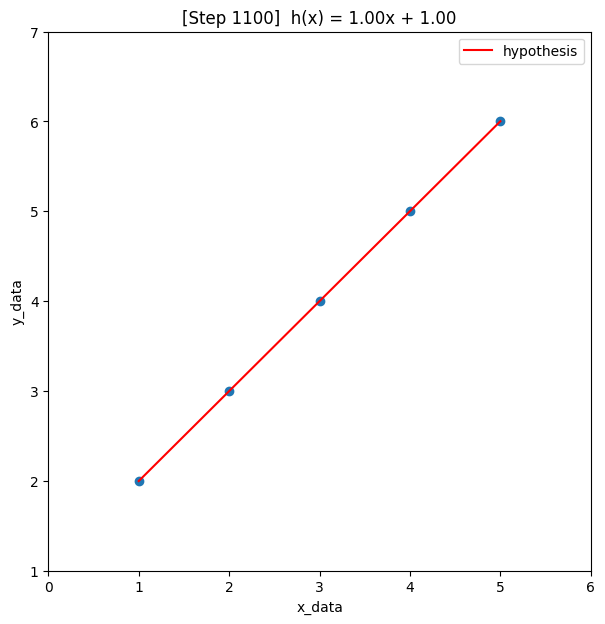

In [67]:
# 경사 하강 알고리즘
# 비용 함수는 예측값과 실젯값의 차이를 제곱해서 평균 낸 값을 반환한다. 오차제곱평균(MSE, mean squared error)
import tensorflow as tf
import matplotlib.pyplot as plt

x_data = [1, 2, 3, 4, 5]
y_data = [2, 3, 4, 5, 6] # y = x + 1 데이터를 준비한다

w = tf.Variable(0.7, dtype='float32') # 가중치를 임의의 값 0.7로 초기화 한다
b = tf.Variable(0.7, dtype='float32') # b를 임의의 값 0.7로 초기화 한다
learn_rate = 0.01 # 학습률은 보통 0.01 ~ 0.001 사이의 값으로 설정한다

print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 1101):
    with tf.GradientTape() as tape: # 내부의 계산 과정을 tape에 기록해둔다.
        hypothesis = w * x_data + b
        cost = tf.reduce_mean((hypothesis - y_data)**2) # tf.losses.mean_squared_error(y, y_hat)
    dw, db = tape.gradient(cost, [w, b]) # w와 b에 대해 손실을 미분해서 dw, db값을 구한다.
    w.assign_sub(learn_rate * dw) # w = w - (학습률 * dw), 새로운 w값을 정함
    b.assign_sub(learn_rate * db) # b = b - (학습률 * bw), 새로운 b값을 정함

    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")
        plt.figure(figsize=(7, 7))
        plt.title(f'[Step {i:d}]  h(x) = { w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o') # ⑥
        plt.plot(x_data, w * x_data + b, 'r', label='hypothesis') # ⑦
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0, 6)
        plt.ylim(1, 7)
        plt.legend(loc='best')
        plt.show()

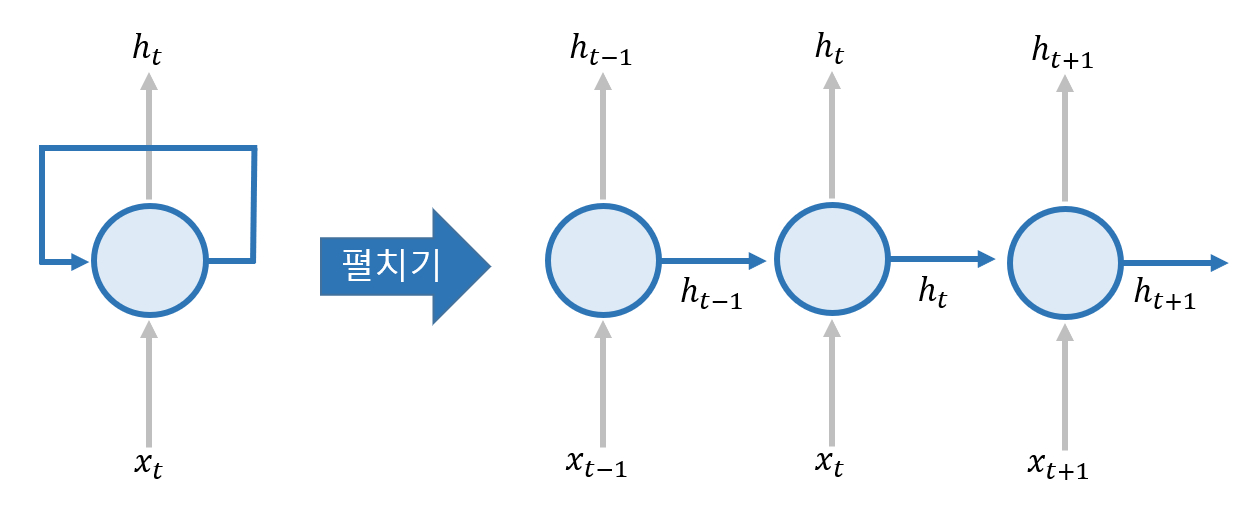

In [68]:
# RNN(Recerrent Neeral Network), 순환 신경망
# ht = tanh(w(ht-1, xt) + b)
# 셀에서 만들어지는 상태 데이터를 은닉 상태, hidden state라고 한다.
# 과거 문맥에 관한 정보를 가지고 있어서 앞으로 발생할 데이터를 예측하는 데 활용된다.
Image("IMG/RNN.png")

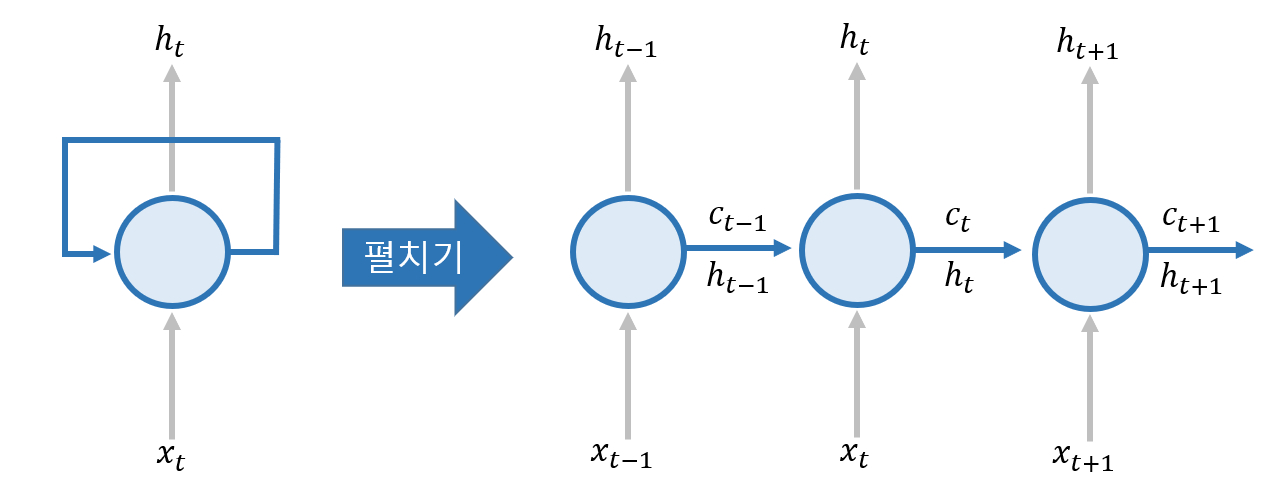

In [74]:
# 기본적인 순환 신경망은 단기 기억을 저장할 수 있다(short term memory)
# 하지만 데이터들의 연관 정보를 파악하려면 기억을 더 길게 유지시켜야 한다
# Long Short Term Memory(LSTM)
Image("IMG/LSTM1.png")

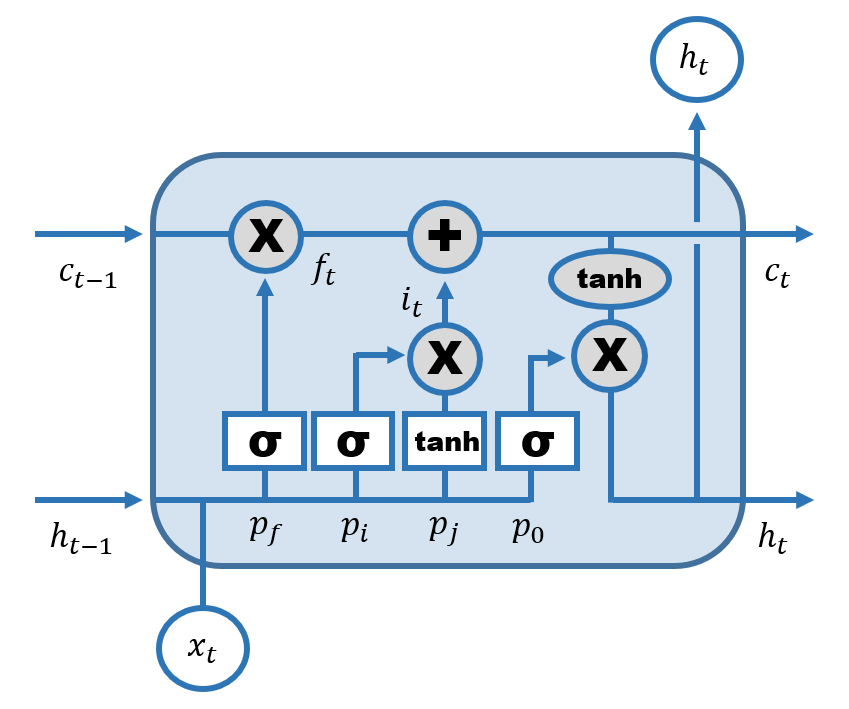

In [75]:
Image("IMG/LSTM2.png")

In [84]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt

raw_df = yf.download('AAPL', '2018-05-04', "2020-01-22", progress = False)

window_size = 10
data_size = 5

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

dfx = raw_df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []
for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df.Close[-1] * pred_y[-1] / dfy.close[-1], 'USD')

[[0.8649039123871095, 0.8900173153077741, 0.866379308353151, 0.2148184537378349, 0.8927720480672158], [0.8998325397440239, 0.8954414497881502, 0.893563279476453, 0.18679455779427853, 0.8847853420907187], [0.8843600348903093, 0.9158685056802723, 0.8917241569276995, 0.2551437420406739, 0.911974577106937], [0.9425552092929008, 0.950432790980195, 0.943678228905517, 0.36714625839521126, 0.9484535740204096], [0.9619537182193035, 0.9633584742148578, 0.9554597679184833, 0.2803709031191721, 0.9524185771584321], [0.967958039576084, 0.9887479387056747, 0.9721263994691598, 0.2240804290997081, 0.9899738311908536], [0.9971711182134362, 0.9916331091272864, 0.977988580669764, 0.34313132990986583, 0.9657300418941612], [0.9691703913251377, 0.9796884613185756, 0.9629309621137722, 0.22523375826267858, 0.9581397152260082], [0.9792159439082003, 0.9808425999259512, 0.9775287123383858, 0.1866685044536883, 0.980230990284803], [0.994688448761915, 0.9983843092996342, 0.9942528712775796, 0.27204078002278376, 0.99

2022-12-18 20:15:53.190773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-18 20:15:53.708956: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x1049b7250
2022-12-18 20:15:53.711109: W tensorflow/core/framework/op_kernel.cc:1830] OP_REQUIRES failed at xla_ops.cc:418 : NOT_FOUND: could not find registered platform with id: 0x1049b7250


NotFoundError: Graph execution error:

Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/xq/lsnzvcmx4c1fglwj6nlhf1qc0000gn/T/ipykernel_27009/4233630376.py", line 53, in <module>
      model.fit(train_x, train_y, epochs=60, batch_size=30)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_6'
Detected at node 'StatefulPartitionedCall_6' defined at (most recent call last):
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 596, in run_forever
      self._run_once()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/base_events.py", line 1890, in _run_once
      handle._run()
    File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2940, in run_cell
      result = self._run_cell(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 2995, in _run_cell
      return runner(coro)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3194, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3373, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3433, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/xq/lsnzvcmx4c1fglwj6nlhf1qc0000gn/T/ipykernel_27009/4233630376.py", line 53, in <module>
      model.fit(train_x, train_y, epochs=60, batch_size=30)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 527, in minimize
      self.apply_gradients(grads_and_vars)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1140, in apply_gradients
      return super().apply_gradients(grads_and_vars, name=name)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 634, in apply_gradients
      iteration = self._internal_apply_gradients(grads_and_vars)
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1166, in _internal_apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1216, in _distributed_apply_gradients_fn
      distribution.extended.update(
    File "/Users/taewan/PycharmProjects/stock/venv/lib/python3.10/lib/python3.9/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 1211, in apply_grad_to_update_var
      return self._update_step_xla(grad, var, id(self._var_key(var)))
Node: 'StatefulPartitionedCall_6'
2 root error(s) found.
  (0) NOT_FOUND:  could not find registered platform with id: 0x1049b7250
	 [[{{node StatefulPartitionedCall_6}}]]
	 [[Func/gradient_tape/sequential_7/lstm_13/while/sequential_7/lstm_13/while_grad/body/_327/input/_916/_416]]
  (1) NOT_FOUND:  could not find registered platform with id: 0x1049b7250
	 [[{{node StatefulPartitionedCall_6}}]]
0 successful operations.
0 derived errors ignored. [Op:__inference_train_function_304943]